Mini Project: Jezlea Ortega and Ishmam

Importing Packages and Cleaning Up Data

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print(pd.__version__)

2.0.0


In [2]:
movies = pd.read_csv('movies.csv')  #Dataset with movie names(release year), genres they belong too, and their movie ID number

display(movies)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [3]:
ratings = pd.read_csv('ratings.csv')    #Dataset with user ratings, ID, movieID for the rated movie, and timestamp for when the rating was done

display(ratings)

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [4]:
merge = movies.merge(ratings, how = 'inner') #inner removes the movies without ratings aka dropping all empty/Null rows

display(merge)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,4.0,1113765937
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,5.0,948885850
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,1442169375
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,4.0,1370810063
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,4.0,1237622631
...,...,...,...,...,...,...
27753439,193878,Les tribulations d'une caissière (2011),Comedy,176871,2.0,1537875080
27753440,193880,Her Name Was Mumu (2016),Drama,81710,2.0,1537886232
27753441,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,33330,2.0,1537890512
27753442,193886,Leal (2018),Action|Crime|Drama,206009,2.5,1537917854


In [5]:
#Removing unnecessary columns to shorten runtime 
merge = merge.drop(['userId', 'movieId', 'timestamp'], axis = 1)

display(merge)

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
...,...,...,...
27753439,Les tribulations d'une caissière (2011),Comedy,2.0
27753440,Her Name Was Mumu (2016),Drama,2.0
27753441,Flora (2017),Adventure|Drama|Horror|Sci-Fi,2.0
27753442,Leal (2018),Action|Crime|Drama,2.5


Finding Basic Statistics of Data

In [6]:
#Calculate total number of movies 
movieId = movies['title']

movieId.drop_duplicates(inplace = True)    #Making it so the movieId column has only one type of each movie

total_number_of_movies = len(movieId.index) #Remaining movies should have one of each, so total movies is length of the column

print('The total number of movies is:' , total_number_of_movies)

The total number of movies is: 58020


In [7]:
#Calculate total number of unique genres
newMg = merge.copy()
newMg['genres'] = newMg['genres'].astype(str).str.split('|') #Splitting the genre column by '|' to get each different genre name

newTest = newMg.explode('genres') #transforms the column with lists into a new DataFrame with one row for each item in the list.

unique_genres = newTest['genres'].unique() #Putting into a new set each different genre string

index = np.where(unique_genres == '(no genres listed)') #finds the index of '(no genres listed)' in the nparray

unique_genres = np.delete(unique_genres, index) #deletes '(no genre listed)' from the nparray

print('The total number of unique genres is:' , len(unique_genres)) #Printing the amount of unique genres

The total number of unique genres is: 19


In [8]:
#Calculate the average number of ratings per movie
avg_num_ratings = merge.groupby('title')['rating'].count().mean() 

print(f'\nThe average number of ratings is {avg_num_ratings}.')


The average number of ratings is 515.700317743464.


Data Analysis

In [9]:
#Calculate the average rating for each movie
merge.groupby('title')['rating'].mean() #Grouping each movie with their respective ratings, adding them up, and dividing by total

title
"Great Performances" Cats (1998)          2.815556
#1 Cheerleader Camp (2010)                2.777778
#Captured (2017)                          2.500000
#Horror (2015)                            2.078947
#SCREAMERS (2016)                         2.500000
                                            ...   
…And the Fifth Horseman Is Fear (1965)    3.250000
キサラギ (2007)                               3.666667
チェブラーシカ (2010)                            3.150000
貞子3D (2012)                               2.136364
줄탁동시 (2012)                               4.000000
Name: rating, Length: 53817, dtype: float64

In [10]:
# Calculate the top 10 highest-rated (average rating) movies with a minimum number of ratings to be considered
def top_ten_highest(record, minimum):
    new_df = record.copy() #creates a copy of the dataframe and initializes it to a new dataframe

    new_df['count'] = 1 #creates a column called count and puts the number 1 in each row

    average_rating = new_df.groupby(['title']).agg({'rating':'mean', 'count':'sum'}) #groups movies together and finds the total number of ratings and average rating for that movie

    averages_with_minimum = average_rating[average_rating['count'] >= minimum] #filters out the movies with less than the minimum amount of ratings
    
    highest_rated = averages_with_minimum.sort_values(['rating'], ascending = False) #sorts the movies from highest rated to lowest
    
    print(highest_rated[:10]['rating']) #Shows the first 10 ratings to find the top ten highest rated 
    
top_ten_highest(merge, 1000)

title
Planet Earth (2006)                            4.458092
Shawshank Redemption, The (1994)               4.424188
Black Mirror: White Christmas (2014)           4.350559
Godfather, The (1972)                          4.332893
Usual Suspects, The (1995)                     4.291959
Godfather: Part II, The (1974)                 4.263035
Schindler's List (1993)                        4.257502
Seven Samurai (Shichinin no samurai) (1954)    4.254116
12 Angry Men (1957)                            4.237075
Rear Window (1954)                             4.230799
Name: rating, dtype: float64


In [11]:
#Identify the top 10 most-rated movies (popularity, number of ratings )  
most_rated = merge.groupby('title')['rating'].count().sort_values(ascending = False) #Grouping each movie with their ratings, counting how many ratings each has, and sorting in descending order

print(most_rated.head(10))                                                           #We order in descending because the top ten movies with the highest count had the most ratings

title
Shawshank Redemption, The (1994)             97999
Forrest Gump (1994)                          97040
Pulp Fiction (1994)                          92406
Silence of the Lambs, The (1991)             87899
Matrix, The (1999)                           84545
Star Wars: Episode IV - A New Hope (1977)    81815
Jurassic Park (1993)                         76451
Schindler's List (1993)                      71516
Braveheart (1995)                            68803
Toy Story (1995)                             68469
Name: rating, dtype: int64


In [12]:
#Analyze the distribution of ratings across different genres

newMg = newTest.copy() # initializes a copy of newTest, which has all the genres separated out, into another variable so we don't modify the original

genres_and_rating = newMg[~newMg['genres'].str.contains('\(no genres listed\)')].groupby('genres')['rating'].mean()

print(genres_and_rating)

genres
Action         3.462566
Adventure      3.513284
Animation      3.607309
Children       3.423893
Comedy         3.419787
Crime          3.683522
Documentary    3.710860
Drama          3.676371
Fantasy        3.507208
Film-Noir      3.928678
Horror         3.284378
IMAX           3.618976
Musical        3.542752
Mystery        3.665570
Romance        3.541862
Sci-Fi         3.470476
Thriller       3.518801
War            3.796597
Western        3.577673
Name: rating, dtype: float64


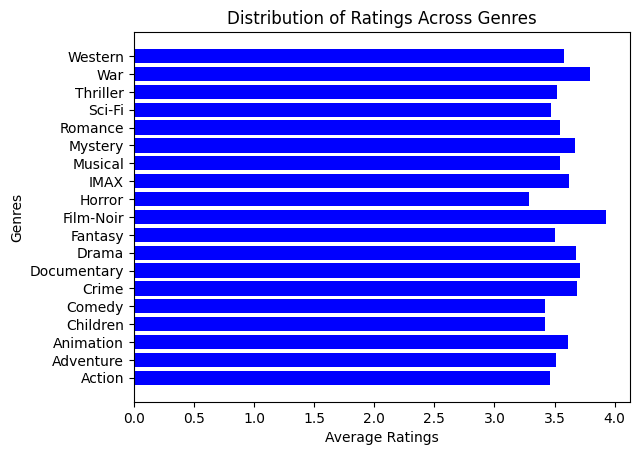

In [13]:
#Analyze the distribution of ratings across different genres (CONTINUED)
genres = genres_and_rating.array
ratings = genres_and_rating.index.values

plt.barh(ratings, genres,color = 'b')  #Using a horizonatal bar graph to show which genres had the most and least distribution of ratings
plt.ylabel('Genres')          #Giving the y-axis all the different unique genre names
plt.xlabel('Average Ratings') #Giving our chart an x-axis which will be our ratings scale
plt.title('Distribution of Ratings Across Genres') 

plt.show() #Displaying the chart

Investigate the relationship between the release year and average rating per genre

In [14]:
test_random = merge.copy() #initializes a copy of merge into a variable

test_random['release year'] = test_random['title'].str.extract('\((\d{4})\)') #isolates the release year into its own column

display(test_random) #Dataframe with the release year seperated out

,title,genres,rating,release year
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,1995
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,1995
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,1995
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,1995
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,1995
...,...,...,...,...
27753439,Les tribulations d'une caissière (2011),Comedy,2.0,2011
27753440,Her Name Was Mumu (2016),Drama,2.0,2016
27753441,Flora (2017),Adventure|Drama|Horror|Sci-Fi,2.0,2017
27753442,Leal (2018),Action|Crime|Drama,2.5,2018


In [15]:
test_random.dropna(subset=['release year'], inplace=True) #drops all 'nan' values

unique_years = test_random['release year'].unique() #Checking if we successfully extracted all the years, and don't have any NULL or incorrect values

display(unique_years)

array(['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993',
       '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1959', '1968', '1980', '1975', '1986', '1948', '1943', '1950',
       '1946', '1987', '1997', '1974', '1956', '1958', '1949', '1972',
       '1998', '1933', '1952', '1951', '1957', '1961', '1954', '1934',
       '1944', '1963', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1979', '1971', '1978',
       '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927',
       '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923',
       '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915',
       '2004', '1916', '1917', '2005', '2006', '1902', '1903', '2007',
       '2008', '2009', '1912', '2010', '1913', '2011', '1898', '1899',
       '1894', '2012', '1909', '1910', '1901', '1893', '2013', '1896',
      

In [16]:
#newMg['genres'] = newMg['genres'].astype(str).str.split('|') #Splitting the genre column by '|' to get each different genre name

#newTest = newMg.explode('genres') #transforms the column with lists into a new DataFrame with one row for each item in the list.
test_random['genres'] = test_random['genres'].astype(str).str.split('|')
test_random = test_random.explode('genres')
display(test_random)

,title,genres,rating,release year
0,Toy Story (1995),Adventure,4.0,1995
0,Toy Story (1995),Animation,4.0,1995
0,Toy Story (1995),Children,4.0,1995
0,Toy Story (1995),Comedy,4.0,1995
0,Toy Story (1995),Fantasy,4.0,1995
...,...,...,...,...
27753442,Leal (2018),Crime,2.5,2018
27753442,Leal (2018),Drama,2.5,2018
27753443,Leal (2018),Action,4.0,2018
27753443,Leal (2018),Crime,4.0,2018


In [17]:
def find_average_rating(genre):
    allGenres = test_random.copy() 
    specificGenre = allGenres[allGenres['genres'] == genre] #focuses on one specific genre, filters out the rest   
    release_and_rating = specificGenre.drop(['genres'], axis = 1) #removes genre column because its no longer needed    
    averageRating_perYear =  release_and_rating.groupby('release year')['rating'].mean() #groups together by release year and then finds average rating for each year
    return averageRating_perYear

In [18]:
avg_rating_genre_list = {} #dictionary to hold data 
for genre in unique_genres:
    data = find_average_rating(genre)  #using the function we find average rating per year for each genre, and put it into a variable   
    avg_rating_genre_list[genre] = data #the key is set to the genre name, and value is set to the variable

print(avg_rating_genre_list)


{'Adventure': release year
1902    3.733516
1903    3.500000
1904    3.166667
1910    2.600000
1911    3.433333
          ...   
2014    3.532169
2015    3.661129
2016    3.598329
2017    3.571401
2018    3.611344
Name: rating, Length: 111, dtype: float64, 'Animation': release year
1892    2.714286
1900    1.500000
1906    2.750000
1908    2.958333
1911    3.633333
          ...   
2014    3.715787
2015    3.675131
2016    3.668759
2017    3.547730
2018    3.679552
Name: rating, Length: 106, dtype: float64, 'Children': release year
1899    3.625000
1902    2.000000
1905    2.500000
1914    2.590909
1915    2.750000
          ...   
2014    3.433004
2015    3.625459
2016    3.707769
2017    3.594947
2018    3.468636
Name: rating, Length: 97, dtype: float64, 'Comedy': release year
1890    2.000000
1894    2.050000
1895    2.978261
1896    2.833333
1897    3.000000
          ...   
2014    3.548730
2015    3.497597
2016    3.519444
2017    3.319244
2018    3.496994
Name: rating, Length: 1

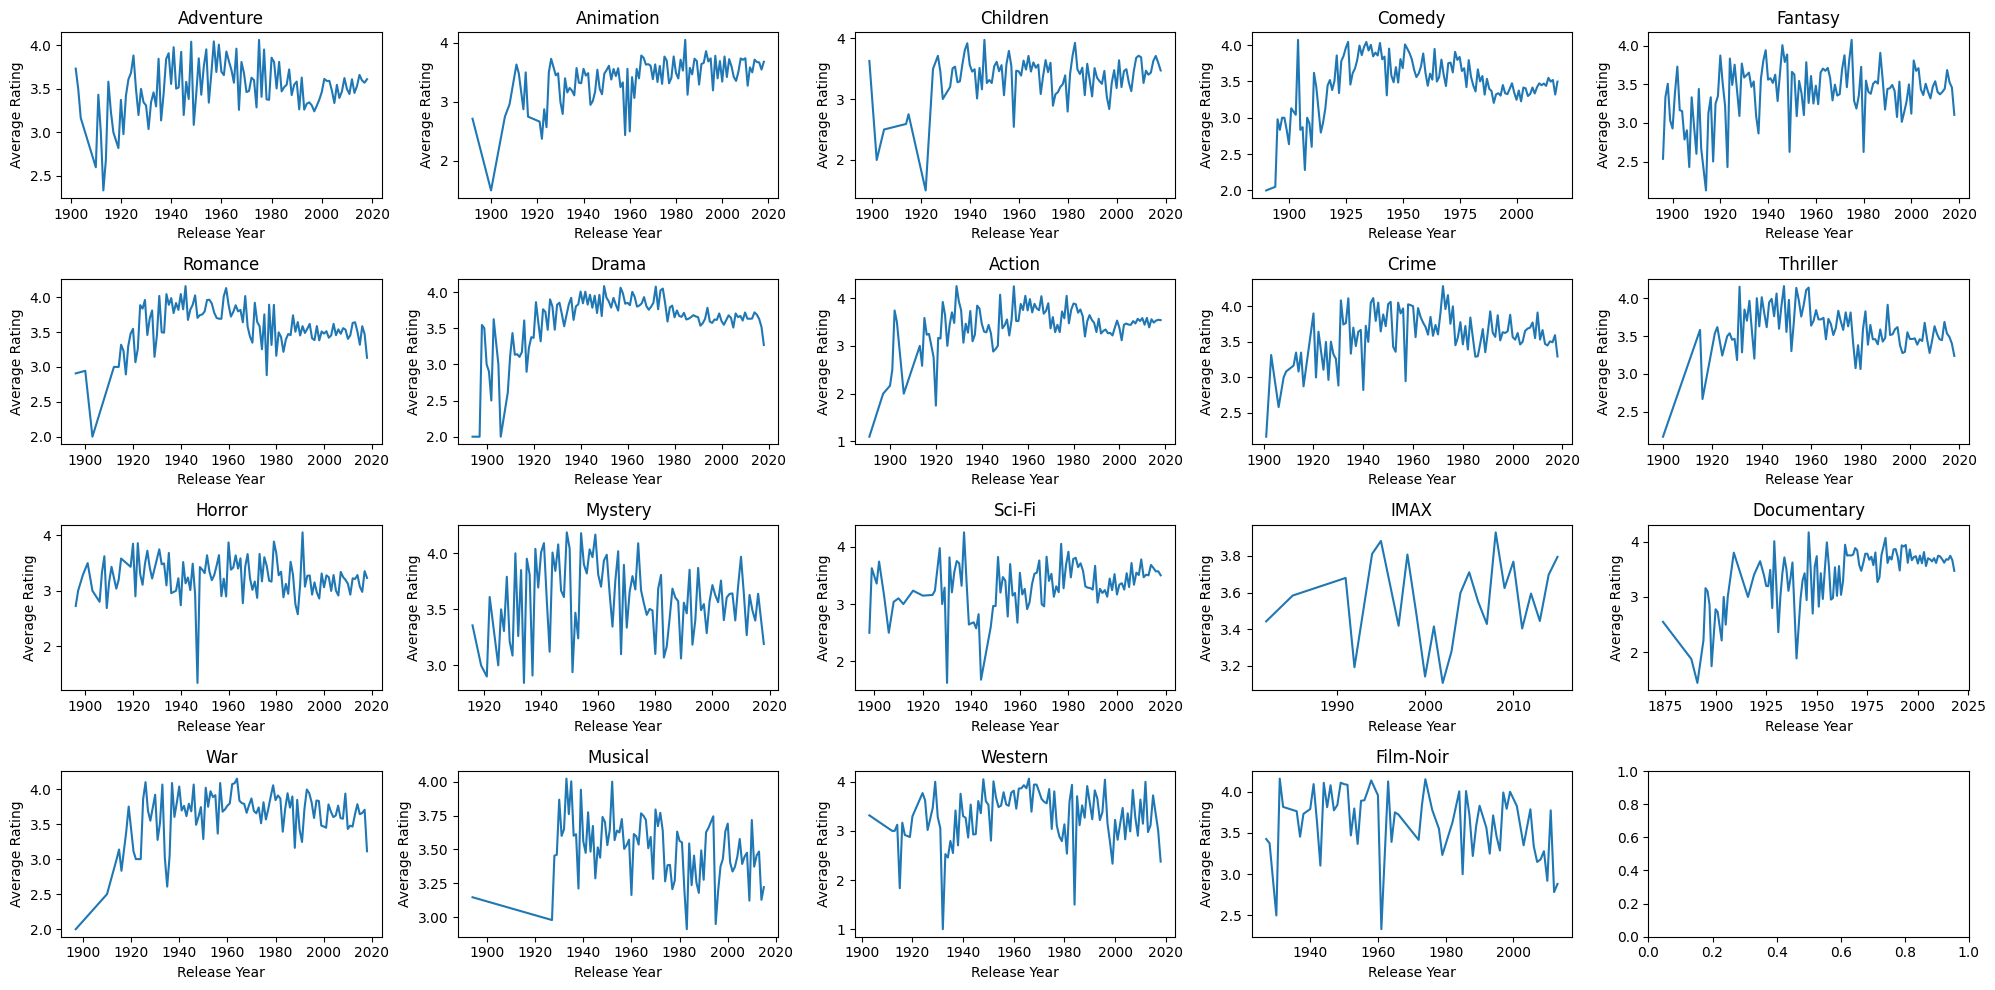

In [19]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(20, 10), dpi=100) #creating 20 graphs 

for ax, (genre, genre_data) in zip(axs.flat, avg_rating_genre_list.items()): #iterates through two lists simultaneously, axs.flat is all the graphs and ax is for each graph to be plotted on
    ax.plot(genre_data.index.astype(int), genre_data.values) #plots release year and average rating data
    ax.set_xlabel('Release Year') #Labels x axis
    ax.set_ylabel('Average Rating') #Labels y axis
    ax.set_title(genre) #Labels title

plt.tight_layout() #adjusts the size of the subplots to fit the figure area
plt.show()

In [20]:
#Count total number of ratings for each genre
newMg = newTest.copy()
total = newMg.groupby('genres')['rating'].count()
print(total.head(20))

genres
(no genres listed)       18389
Action                 8214956
Adventure              6452309
Animation              1803041
Children               2381124
Comedy                 9999184
Crime                  4631581
Documentary             345471
Drama                 12191048
Fantasy                3118549
Film-Noir               272742
Horror                 2070791
IMAX                   1102179
Musical                1109674
Mystery                2210388
Romance                5078478
Sci-Fi                 4740208
Thriller               7489628
War                    1426112
Western                 542424
Name: rating, dtype: int64


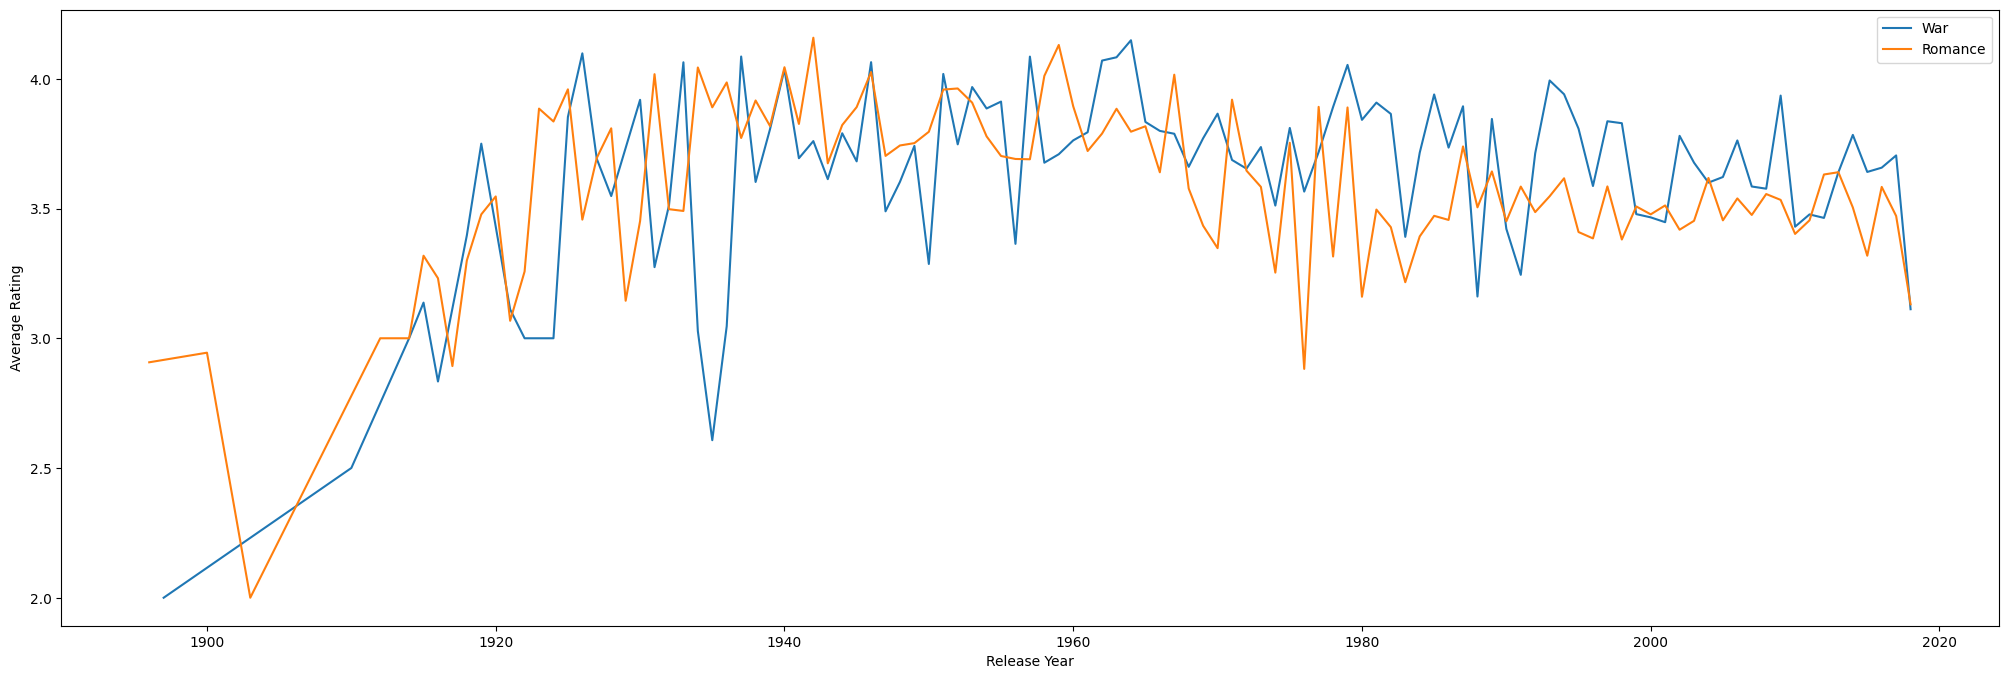

In [21]:
#Compare two genres for average rating vs release year

genres_to_compare = {}

genre1 = 'War'
genre2 = 'Romance'

genre1_data = find_average_rating(genre1)
genre2_data = find_average_rating(genre2)

genres_to_compare = {genre1: genre1_data, genre2: genre2_data} # dictionary of genres to compare

fig, ax = plt.subplots(figsize=(25, 8),dpi=100)

for genre, genre_data in genres_to_compare.items():
    ax.plot(genre_data.index.astype(int), genre_data.values, label=genre)

ax.set_xlabel('Release Year')
ax.set_ylabel('Average Rating')
ax.legend()

plt.show()



Results and Conclusion

In [25]:
newMerge = test_random.copy() #Dataframe with the release year seperated out
average_ratings_yearly = newMerge.groupby('release year')['rating'].mean() #Finding the average rating per year with the mean function
print(average_ratings_yearly)

release year
1874    2.550000
1878    2.928571
1883    2.300000
1887    1.777778
1888    1.879310
          ...   
2014    3.612141
2015    3.586680
2016    3.557640
2017    3.502551
2018    3.426604
Name: rating, Length: 134, dtype: float64


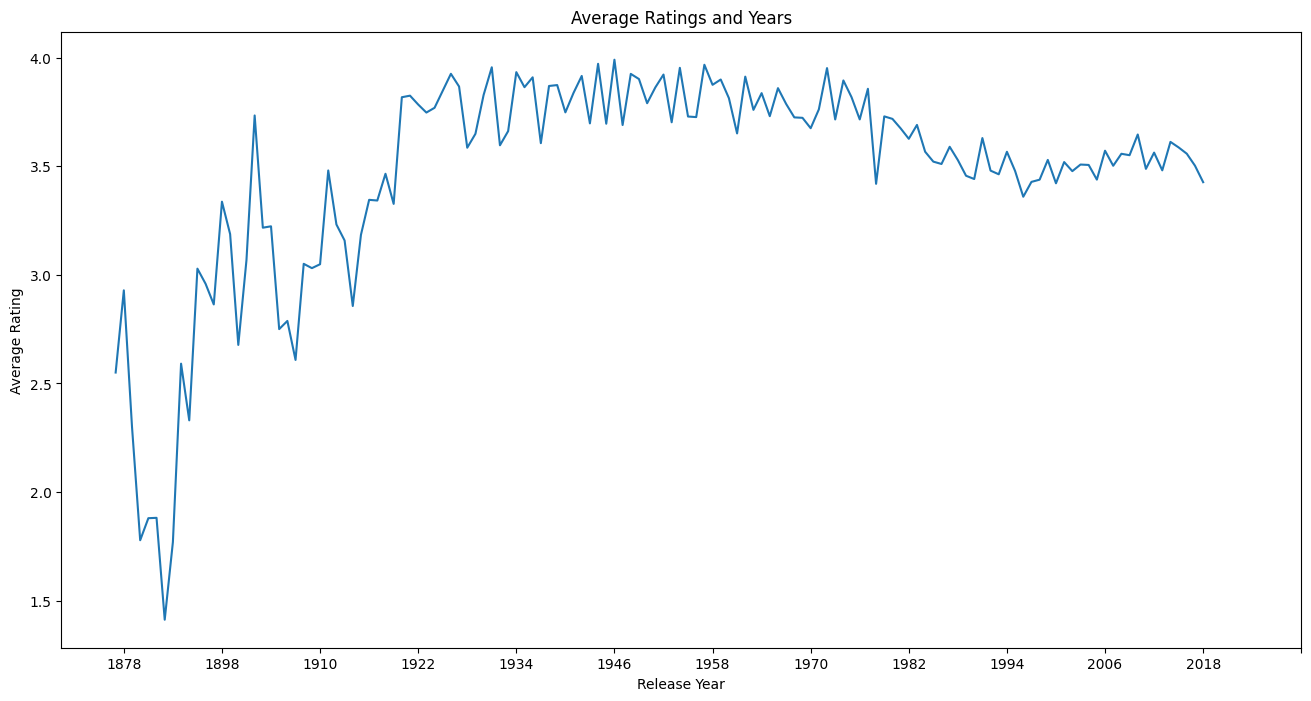

In [26]:
fig, ax = plt.subplots(figsize=(16, 8),dpi=100)

x = average_ratings_yearly.index.values #Assigning the release years to the x axis
y = average_ratings_yearly.array       #Assigning the average ratings to the y axis

plt.plot(x,y)

plt.xticks(range(1, 150, 12)) #Fixing spacing issues in release year

ax.set_xlabel('Release Year') #Labelling the columns
ax.set_ylabel('Average Rating')

plt.title('Average Ratings and Years')
plt.show()                   #Showing graph